In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble


In [84]:
insurance_df = pd.read_csv('train.csv')


In [85]:
insurance_df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [86]:
insurance_df.isnull().sum()

Id                    0
Product_Info_1        0
Product_Info_2        0
Product_Info_3        0
Product_Info_4        0
                     ..
Medical_Keyword_45    0
Medical_Keyword_46    0
Medical_Keyword_47    0
Medical_Keyword_48    0
Response              0
Length: 128, dtype: int64

<AxesSubplot: >

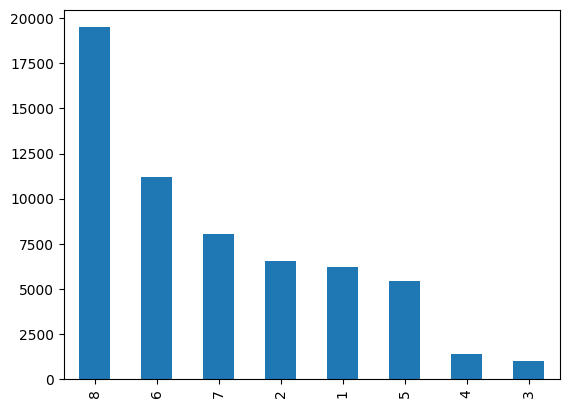

In [87]:
insurance_df['Response'].value_counts().plot(kind='bar')

In [88]:
insurance_df['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

In [89]:
insurance_df['Response'].isnull().sum()

0

In [95]:
def modified_response(row):
  if ((row['Response'] <=7) & (row['Response'] >=0) ):
    val = 0
  elif (row['Response']==8):
    val = 1
  else:
    val = -1
  
  return val


In [96]:
insurance_df['Modified_Response'] = insurance_df.apply(modified_response,axis = 1)

<AxesSubplot: >

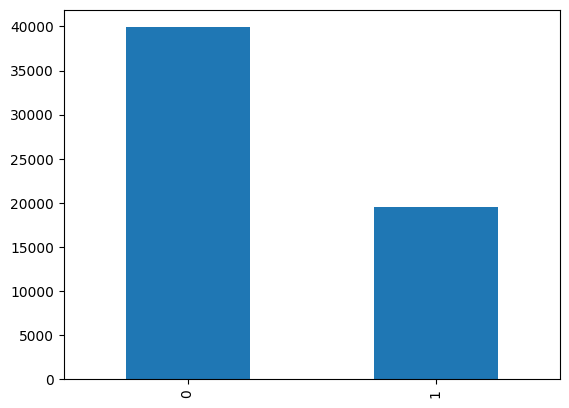

In [98]:
insurance_df['Modified_Response'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='Modified_Response', ylabel='count'>

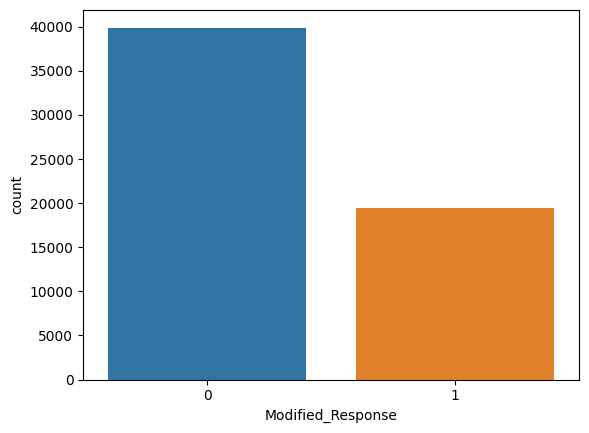

In [99]:
sns.countplot(x= insurance_df['Modified_Response'])

In [101]:
insurance_df.drop(columns=['Response'],inplace=True)

In [103]:
missing_val = insurance_df.isnull().sum()/len(insurance_df)
print(missing_val[missing_val > 0.6].sort_values(ascending = False))

Medical_History_10    0.990620
Medical_History_32    0.981358
Medical_History_24    0.935990
Medical_History_15    0.751015
Family_Hist_5         0.704114
dtype: float64


In [104]:
insurance_df.drop(columns=['Medical_History_10','Medical_History_32','Medical_History_24','Medical_History_15','Family_Hist_5'],inplace=True)

In [106]:
len(list(insurance_df.columns))

123

In [107]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 123 entries, Id to Modified_Response
dtypes: float64(13), int64(109), object(1)
memory usage: 55.7+ MB


In [108]:
insurance_df['Product_Info_2'].value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

In [109]:
one_hot_encoded_data = pd.get_dummies(insurance_df, columns=['Product_Info_2'])
print(one_hot_encoded_data)

          Id  Product_Info_1  Product_Info_3  Product_Info_4  Product_Info_5  \
0          2               1              10        0.076923               2   
1          5               1              26        0.076923               2   
2          6               1              26        0.076923               2   
3          7               1              10        0.487179               2   
4          8               1              26        0.230769               2   
...      ...             ...             ...             ...             ...   
59376  79142               1              10        0.230769               2   
59377  79143               1              26        0.230769               2   
59378  79144               1              26        0.076923               2   
59379  79145               1              10        0.230769               2   
59380  79146               1              26        0.076923               2   

       Product_Info_6  Product_Info_7  

In [114]:
from sklearn.preprocessing import OneHotEncoder 

In [133]:
one_hot_encoded_data = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(one_hot_encoded_data.fit_transform(insurance_df[['Product_Info_2']]).toarray())
final_df = insurance_df.join(encoder_df)

In [134]:
final_df

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,9,10,11,12,13,14,15,16,17,18
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59377,79143,1,D3,26,0.230769,2,3,1,0.432836,0.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59378,79144,1,E1,26,0.076923,2,3,1,0.104478,0.745455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
59379,79145,1,D2,10,0.230769,2,3,1,0.507463,0.690909,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [136]:
final_df.columns


Index([            'Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
              'Ins_Age',             'Ht',
       ...
                      9,               10,               11,               12,
                     13,               14,               15,               16,
                     17,               18],
      dtype='object', length=142)

In [137]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 142 entries, Id to 18
dtypes: float64(32), int64(109), object(1)
memory usage: 64.3+ MB


In [138]:
final_df.drop('Product_Info_2',axis=1,inplace=True)

In [139]:
X = final_df.drop(labels ='Modified_Response',axis=1)
y = final_df['Modified_Response']

In [140]:
X = X.fillna(X.mean())

In [141]:
X.shape , y.shape

((59381, 140), (59381,))

In [142]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.25 ,random_state=42)

In [143]:
X_train.shape

(44535, 140)

In [144]:
X_test.shape

(14846, 140)

In [146]:
y_train.shape

(44535,)

In [147]:
y_test.shape

(14846,)

## Random  Forest  Classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
rf_model = RandomForestClassifier()
n_estimators = [50,80,100]
max_depth = [4,6,8]
min_sample_split = [50,100,150]
min_sample_leaf = [40,50]
param_dict = {'n_estimators' : n_estimators,
             'max_depth' : max_depth,
              'min_sample_split' : min_sample_split,
              'min_sample_leaf' : min_sample_leaf}
rf_model.fit(X_train,y_train)

C:\Users\Jeet Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier()

In [169]:
prediction = rf_model.predict(X_test)

C:\Users\Jeet Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [170]:
prediction

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [171]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
confusion_matrix(y_test, prediction)

array([[8932, 1094],
       [1416, 3404]], dtype=int64)

In [172]:
accuracy_score(y_test, prediction)

0.830930890475549

In [174]:
#accuracy_score(y_train, prediction)

In [176]:
f1_score(y_test,prediction)

0.7306288903198112

In [152]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_sample_split': [50, 100, 150],
 'min_sample_leaf': [40, 50]}

In [178]:
rf_model.feature_importances_


array([3.27597690e-02, 2.58612106e-03, 5.42870514e-03, 3.49502189e-02,
       6.46003917e-04, 4.93064851e-03, 1.59329612e-03, 3.90835360e-02,
       2.74244017e-02, 9.06007259e-02, 1.35112093e-01, 3.00420558e-02,
       1.22941819e-02, 2.98412968e-03, 1.05105254e-02, 3.34948622e-03,
       2.48532648e-02, 6.22518845e-03, 1.66795239e-03, 1.61340195e-02,
       4.13056125e-03, 1.44840142e-03, 1.62706157e-02, 2.36418317e-03,
       3.86994820e-03, 1.96902166e-03, 3.02871014e-03, 5.75483367e-03,
       1.89920830e-02, 4.40664036e-03, 6.48371577e-03, 3.59229242e-03,
       7.73440875e-03, 2.40113748e-02, 1.95016960e-02, 3.05756698e-02,
       2.67084607e-02, 2.44869307e-02, 3.13519215e-03, 4.88310499e-02,
       1.26509170e-03, 2.11100312e-03, 1.32858022e-03, 3.02018471e-03,
       4.91288896e-03, 6.46160372e-04, 2.19565065e-03, 3.81782496e-03,
       1.26139876e-03, 3.97240680e-03, 1.54359677e-03, 2.34293278e-03,
       1.51727918e-03, 1.59874471e-03, 2.96144700e-03, 9.33799659e-04,
      

In [185]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)


In [186]:
#importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [187]:
importance_df

,Feature,Feature Importance
0,Id,0.032760
1,Product_Info_1,0.002586
2,Product_Info_3,0.005429
3,Product_Info_4,0.034950
4,Product_Info_5,0.000646
...,...,...
135,14,0.004151
136,15,0.003244
137,16,0.005675
138,17,0.006826


In [188]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
10,BMI,0.135112
9,Wt,0.090601
39,Medical_History_4,0.048831
56,Medical_History_23,0.042910
7,Ins_Age,0.039084
...,...,...
118,Medical_Keyword_46,0.000204
132,11,0.000193
69,Medical_History_38,0.000160
66,Medical_History_35,0.000074


#                                      THE   END